### SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.decomposition import PCA

In [2]:
#1)load & basic exploration
df=pd.read_csv("mushroom.csv")
print("shape:",df.shape)

shape: (2000, 26)


In [3]:
df.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [4]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [5]:
df.isna().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [6]:
print("duplicates:",df.duplicated().sum())

duplicates: 1024


In [7]:
df=df.drop_duplicates()
print("after dropping duplicates:",df.shape)

after dropping duplicates: (976, 26)


In [8]:
df.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [9]:
df=df.drop(columns=['Unnamed: 0'])

In [10]:
num_cols=df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols=[c for c in df.columns if c not in num_cols]

In [11]:
df.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


Text(0, 0.5, 'count')

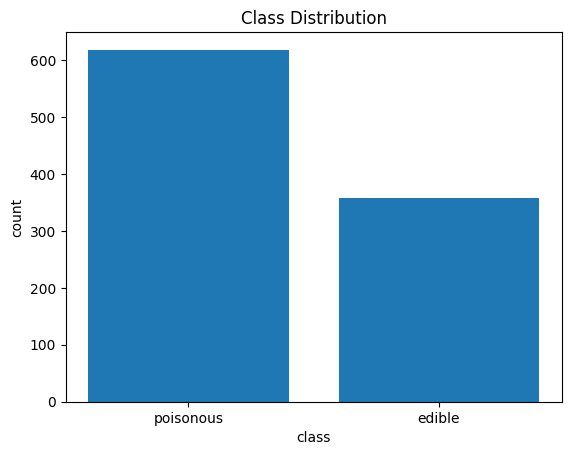

In [12]:
#class distribution
classes=df['class'].value_counts(dropna=False)
plt.figure()
plt.bar(classes.index.astype(str),classes.values)
plt.title("Class Distribution")
plt.xlabel("class");plt.ylabel("count")

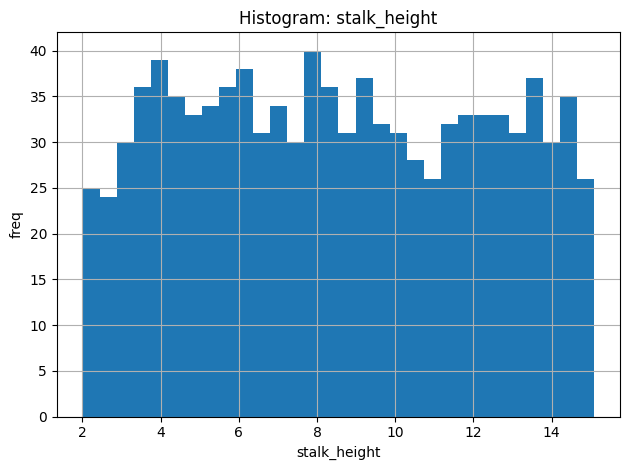

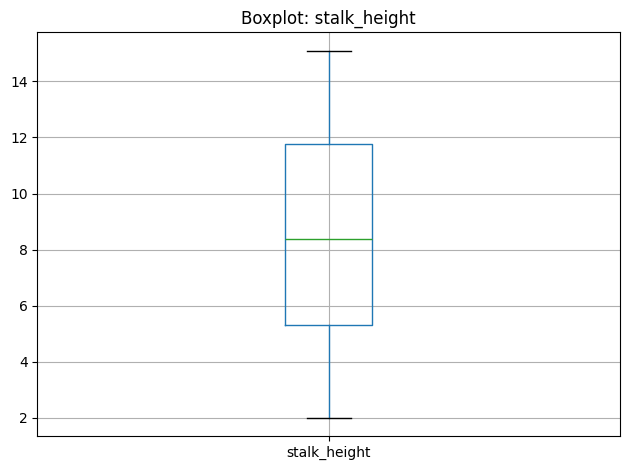

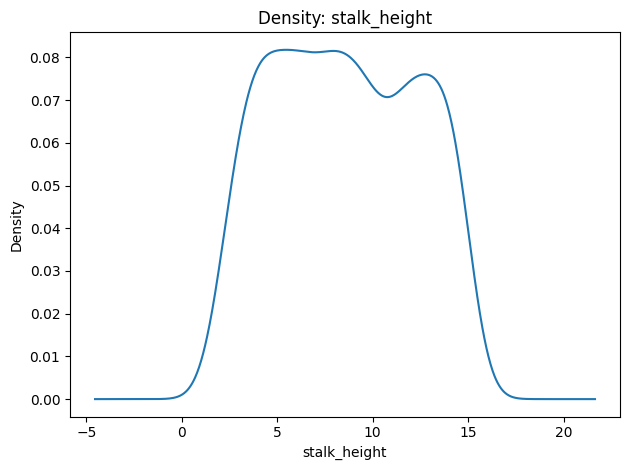

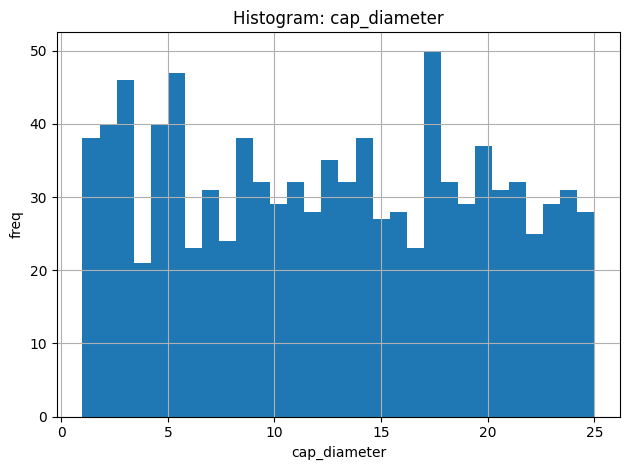

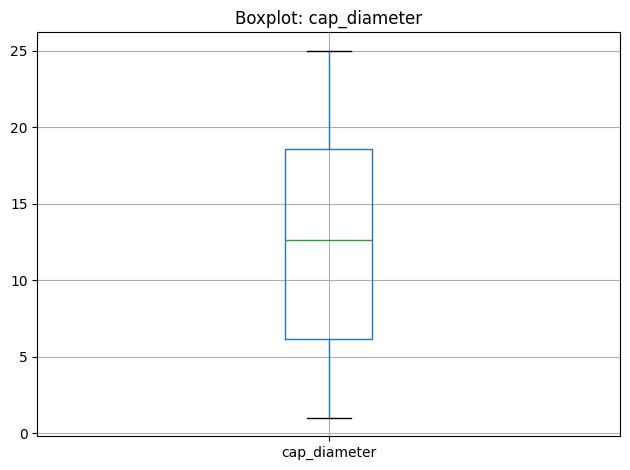

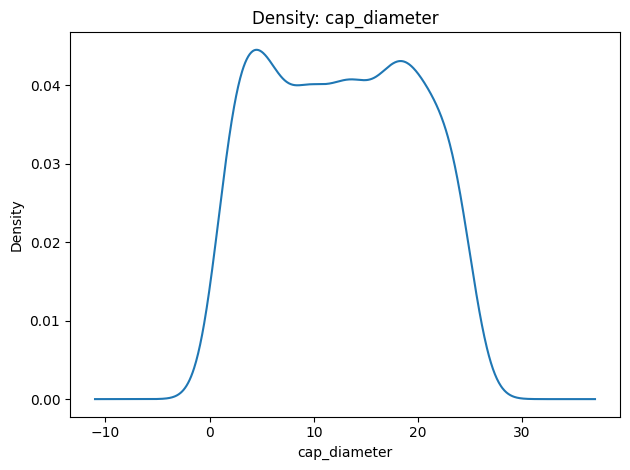

In [13]:
#distributions
#numeric: hist, box, density
for c in num_cols:
    plt.figure()
    df[c].dropna().hist(bins=30)
    plt.title("Histogram: "+c);plt.xlabel(c);plt.ylabel("freq")
    plt.tight_layout();plt.show()

    plt.figure()
    df.boxplot(column=c)
    plt.title("Boxplot: "+c)
    plt.tight_layout();plt.show()

    plt.figure()
    df[c].dropna().plot(kind='kde')
    plt.title("Density: "+c);plt.xlabel(c)
    plt.tight_layout();plt.show()


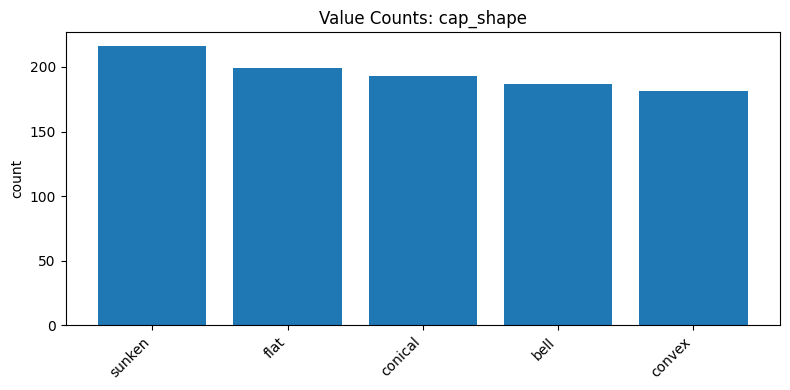

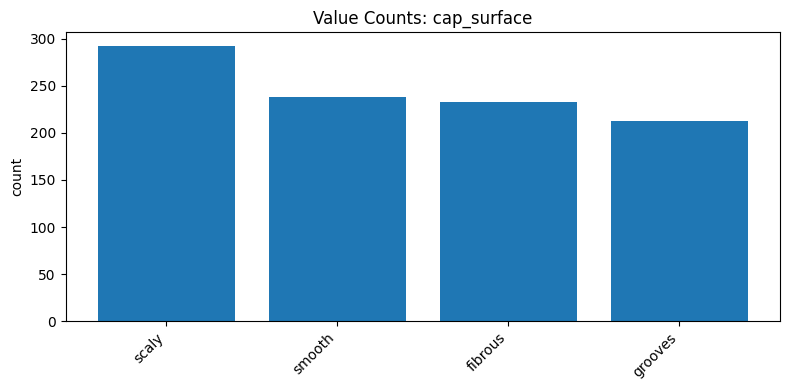

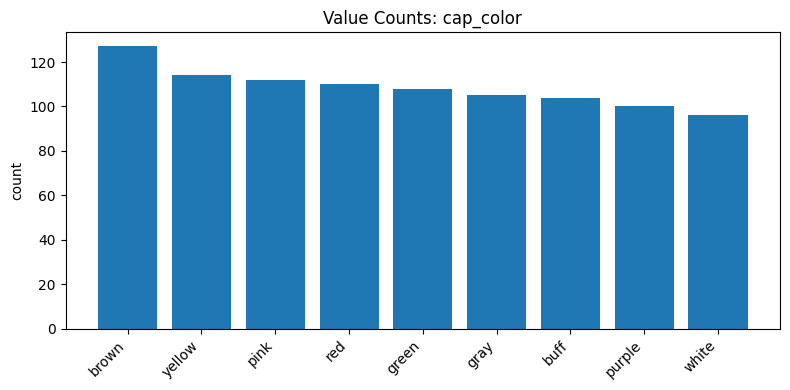

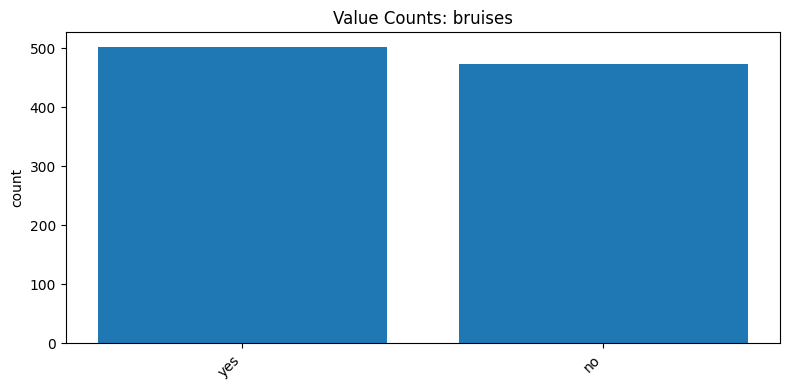

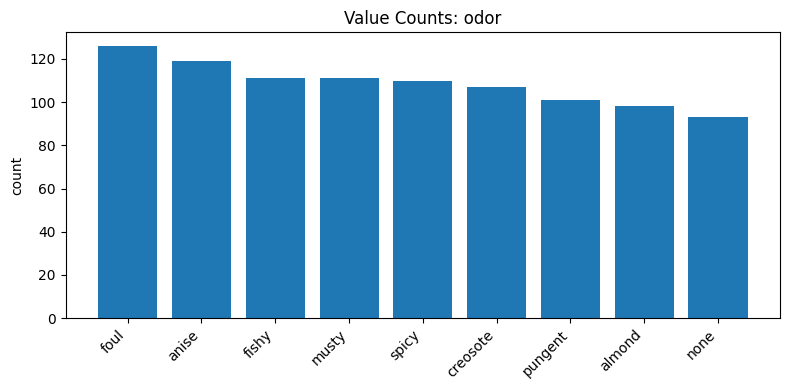

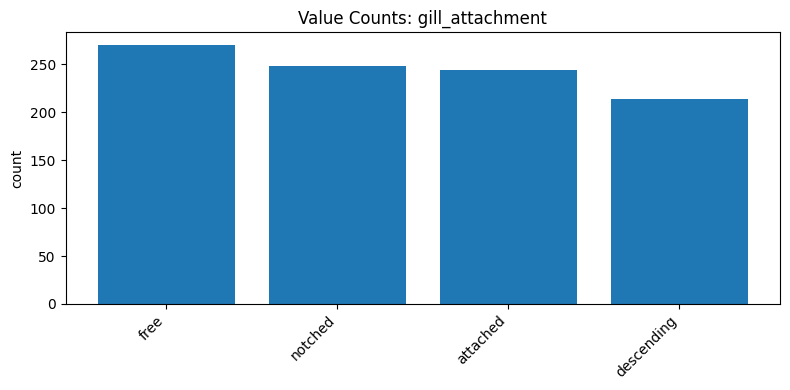

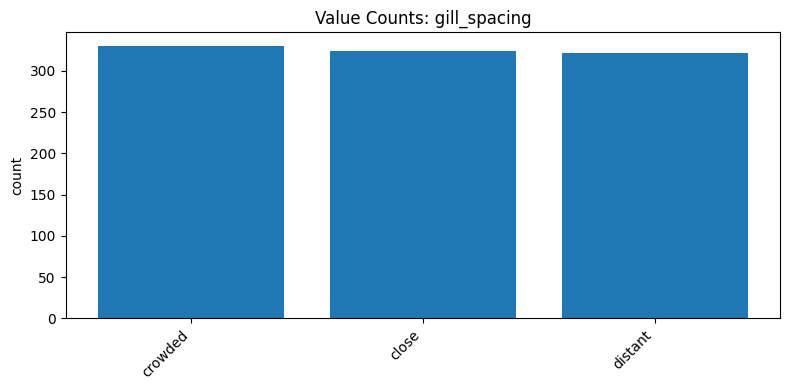

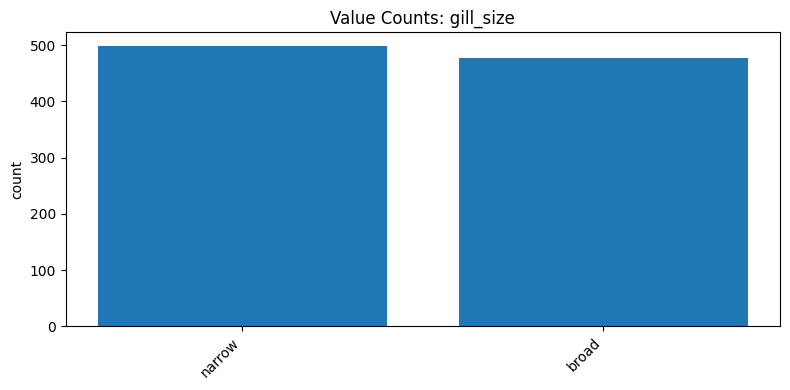

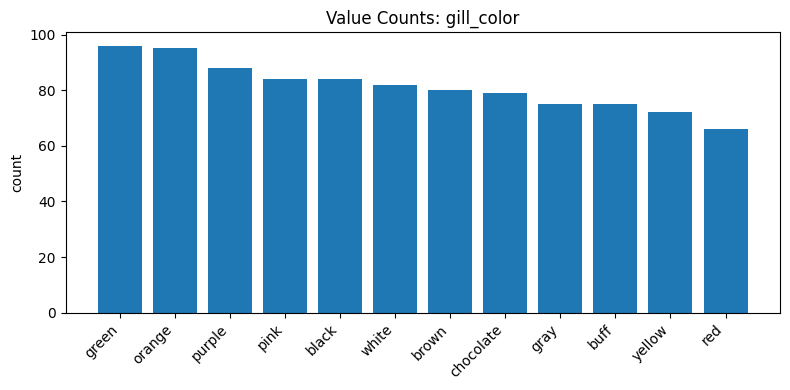

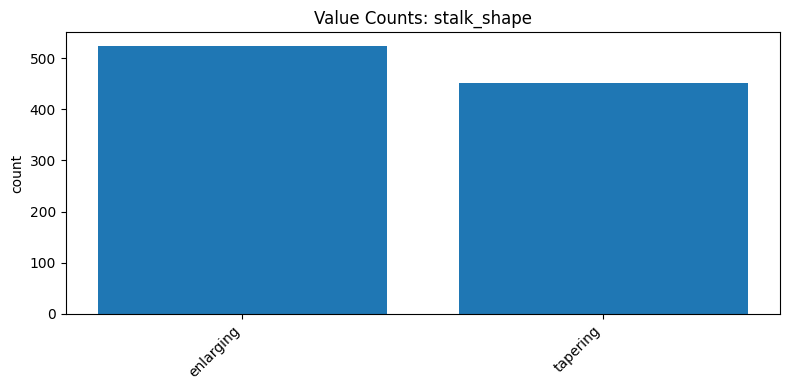

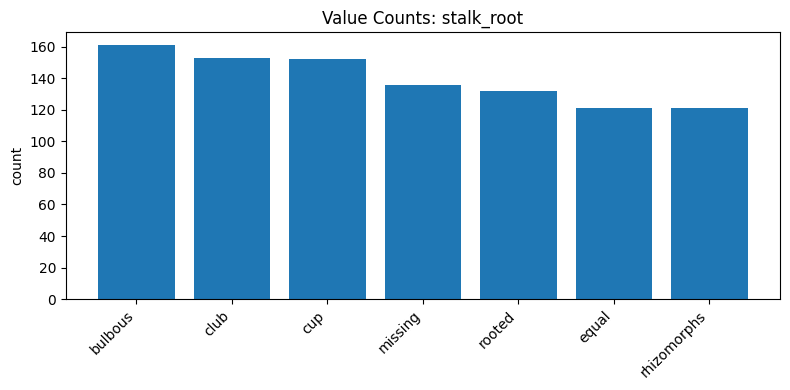

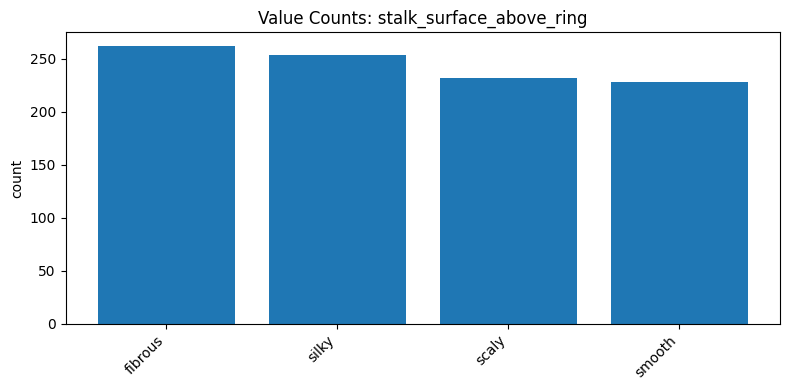

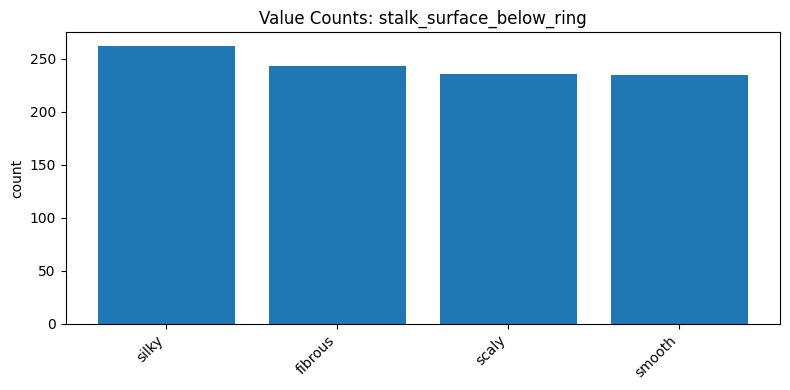

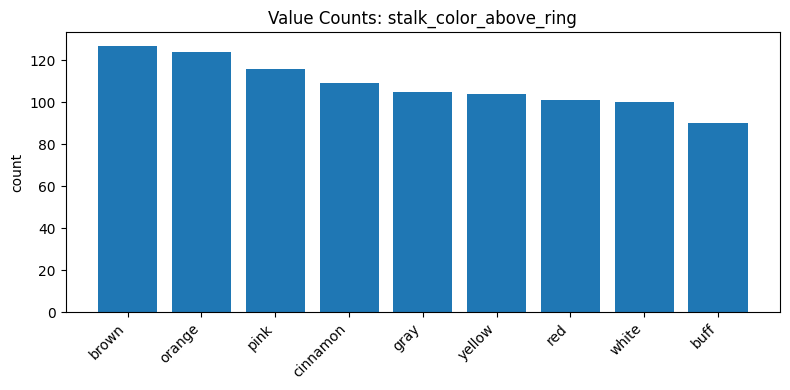

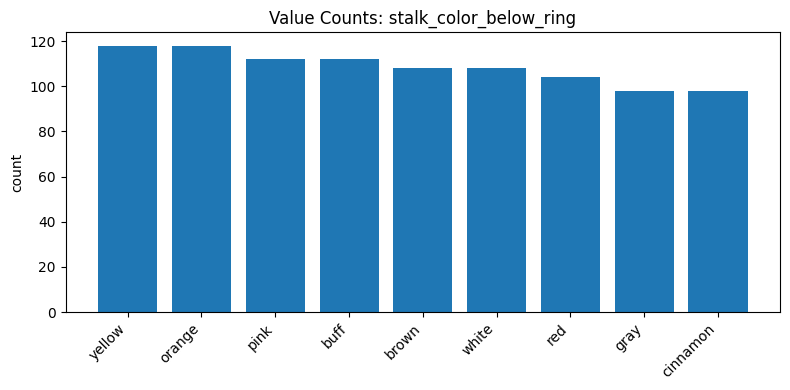

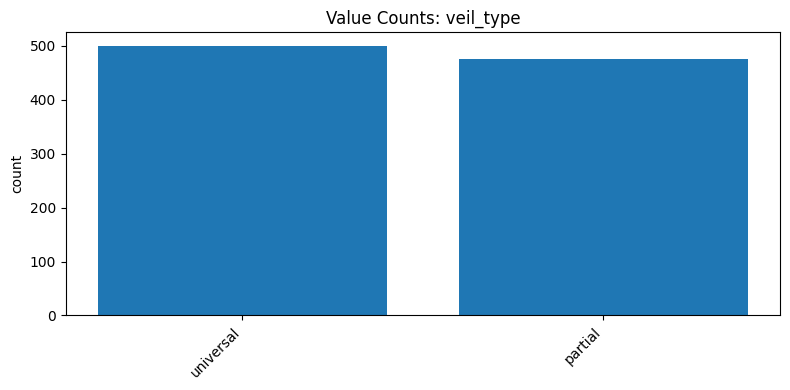

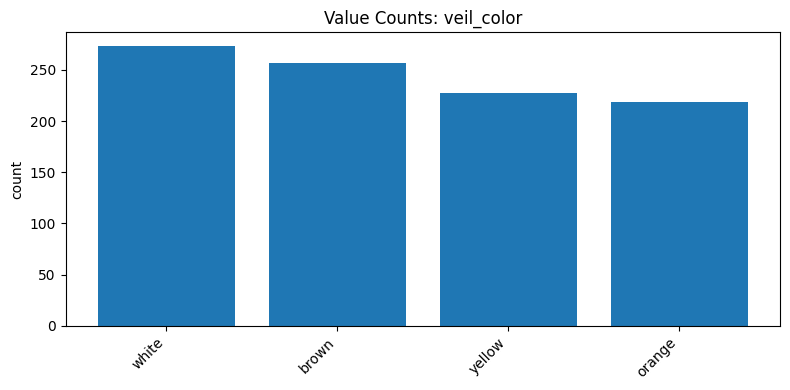

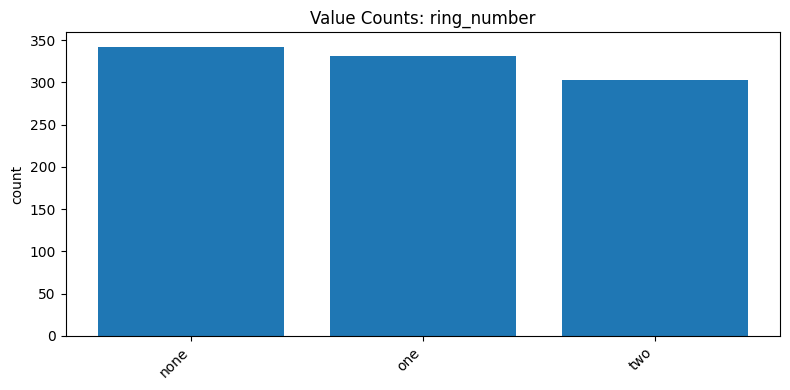

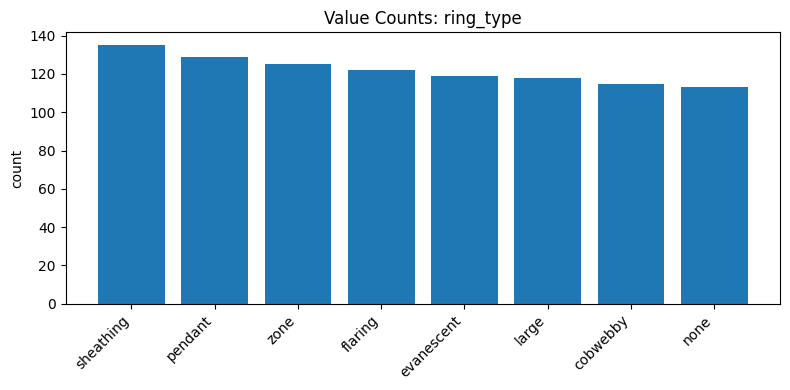

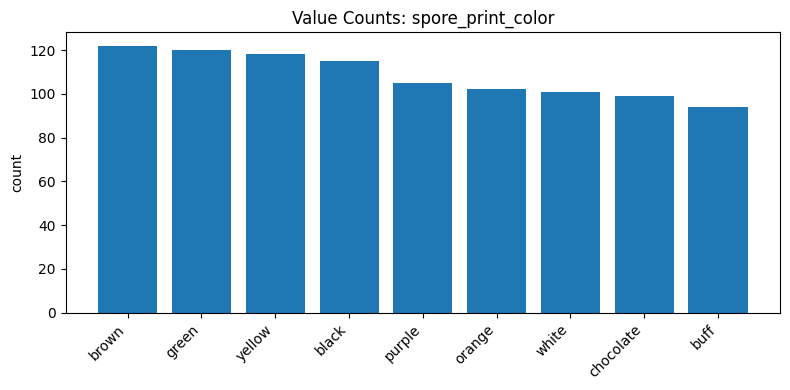

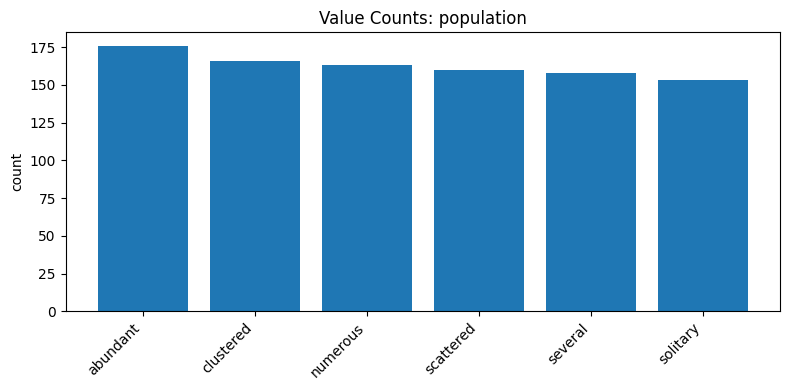

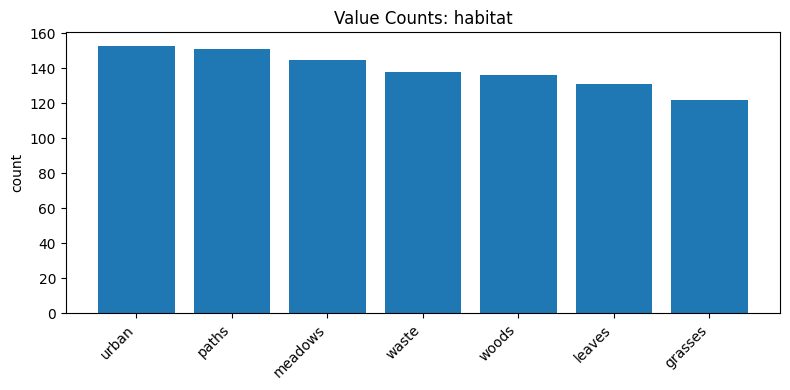

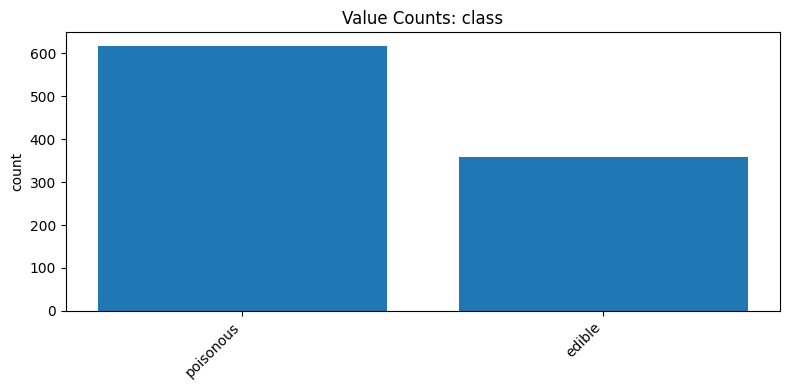

In [ ]:
#categorical: bar plots (top levels since there are many)
for c in cat_cols:
    counts=df[c].value_counts(dropna=False)
    top_counts=counts.head(12)  # keep simple
    plt.figure(figsize=(8,4))
    plt.bar(top_counts.index.astype(str),top_counts.values)
    plt.title("Value Counts: "+c)
    plt.xticks(rotation=45,ha='right')
    plt.ylabel("count")
    plt.tight_layout();plt.show()

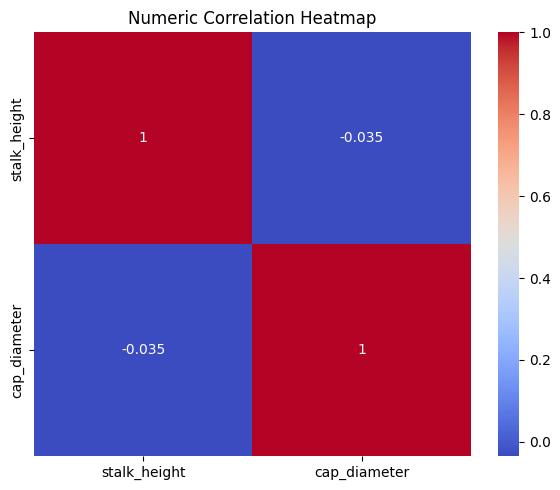

In [15]:
#correlations
#numeric-numeric correlation heatmap
corr=df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Numeric Correlation Heatmap")
plt.tight_layout();plt.show()

In [16]:
#2)Encoding
#separate features and target
X=df.drop(columns=['class'])
y=df['class']

In [17]:
#encode categorical features using get_dummies
X=pd.get_dummies(X)

In [18]:
#encode target
#ensure target is numeric
y_num=y.replace({'e':0,'p':1,'edible':0,'poisonous':1})

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_4920\1703698688.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_num=y.replace({'e':0,'p':1,'edible':0,'poisonous':1})


In [19]:
#split into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print("train shape:",X_train.shape)
print("test shape:",X_test.shape)

train shape: (780, 126)
test shape: (196, 126)


In [20]:
#encode target manually
y_train=y_train.replace({'edible':0,'poisonous':1})
y_test=y_test.replace({'edible':0,'poisonous':1})

C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_4920\985340959.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train=y_train.replace({'edible':0,'poisonous':1})
C:\Users\Srees_lappy\AppData\Local\Temp\ipykernel_4920\985340959.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test=y_test.replace({'edible':0,'poisonous':1})


Since mushroom data is mostly categorical, scatter/pair plots aren’t very useful, so we’ll pick a couple of features and plot them against the target.

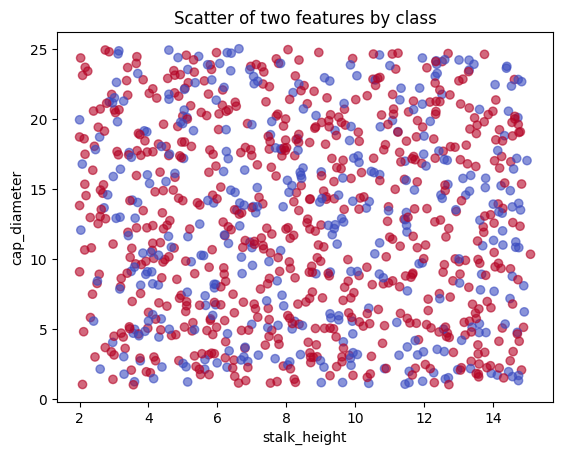

In [21]:
#3)Data visualisation
#picked 2 encoded features to scatter
cols=list(X.columns[:2])
plt.scatter(X[cols[0]],X[cols[1]],c=y_num,alpha=0.6,cmap='coolwarm')
plt.xlabel(cols[0]);plt.ylabel(cols[1])
plt.title("Scatter of two features by class")
plt.show()

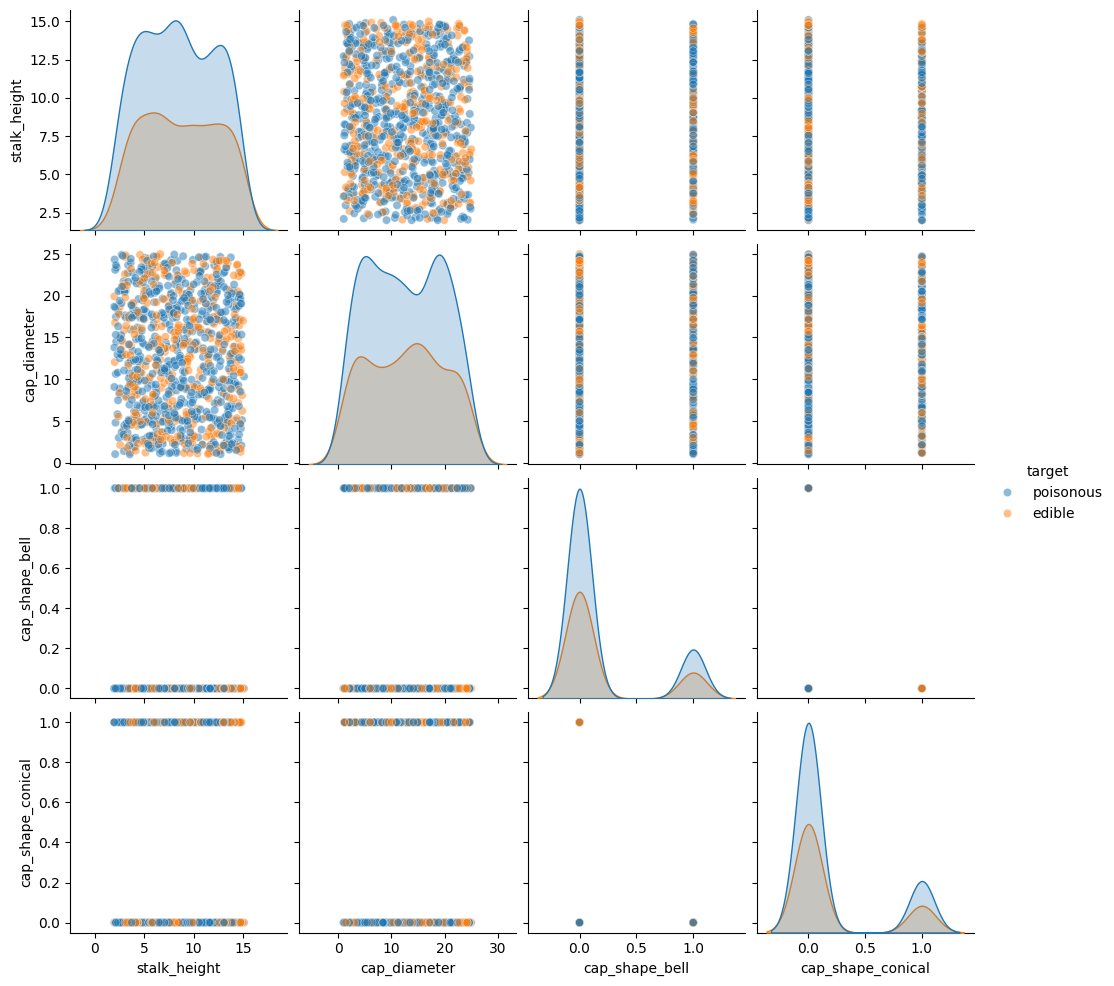

In [22]:
#pairplot for a few features
sample_cols=list(X.columns[:4])+['class']
df_pair=pd.concat([X[sample_cols[:-1]],y],axis=1)
df_pair.rename(columns={'class':'target'},inplace=True)
sns.pairplot(df_pair,hue='target',plot_kws={'alpha':0.5})
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
#4)SVM implementation
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
svm=SVC(kernel='rbf',C=10,gamma='scale')   # make model

svm.fit(X_train,y_train)  #train

y_pred=svm.predict(X_test)   #predict

In [25]:
#5)Evaluate
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("accuracy:",acc)
print("precision:",prec)
print("recall:",rec)
print("f1-score:",f1)

accuracy: 0.5510204081632653
precision: 0.6111111111111112
recall: 0.7983870967741935
f1-score: 0.6923076923076923


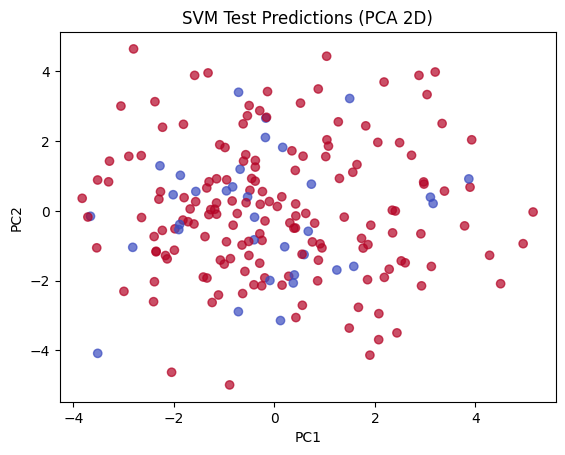

In [26]:
#reduce to 2 components
pca=PCA(n_components=2)
X_test_2d=pca.fit_transform(X_test)

#convert predictions to numeric for coloring
y_pred_num=pd.Series(y_pred).replace({'edible':0,'poisonous':1})

#scatter plot
plt.scatter(X_test_2d[:,0],X_test_2d[:,1],c=y_pred_num,alpha=0.7,cmap='coolwarm')
plt.title("SVM Test Predictions (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [27]:
print(pd.Series(y_pred).value_counts())

1    162
0     34
Name: count, dtype: int64


In [28]:
#6)parameter tuning and optimisation
from sklearn.model_selection import GridSearchCV

#try different kernels and C values
params={'kernel':['linear','rbf','poly'],'C':[0.1,1,10]}

svm=SVC()
grid=GridSearchCV(svm,params,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)

print("best params:",grid.best_params_)
print("best score:",grid.best_score_)

best params: {'C': 0.1, 'kernel': 'rbf'}
best score: 0.6333333333333333


In [29]:
#test performance with best model
best=grid.best_estimator_
y_pred=best.predict(X_test)

acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)

print("test accuracy:",acc)
print("test precision:",prec)
print("test recall:",rec)
print("test f1:",f1)

test accuracy: 0.6326530612244898
test precision: 0.6326530612244898
test recall: 1.0
test f1: 0.775


In [30]:
#7)comparing different kernels
kernels=['linear','poly','rbf']
for k in kernels:
    model=SVC(kernel=k)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    prec=precision_score(y_test,y_pred)
    rec=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    print("kernel:",k)
    print("accuracy:",acc,"precision:",prec,"recall:",rec,"f1:",f1)
    print("----")


kernel: linear
accuracy: 0.5663265306122449 precision: 0.6291390728476821 recall: 0.7661290322580645 f1: 0.6909090909090909
----
kernel: poly
accuracy: 0.6326530612244898 precision: 0.6326530612244898 recall: 1.0 f1: 0.775
----
kernel: rbf
accuracy: 0.6275510204081632 precision: 0.6321243523316062 recall: 0.9838709677419355 f1: 0.7697160883280757
----


#### Strengths and Weaknesses of SVM on Mushroom dataset

**Strengths:** SVM works well on high-dimensional data (like this dataset with many encoded categorical features). 
* It can create clear separating boundaries between edible and poisonous mushrooms.

**Weaknesses:** From the visualizations, the model sometimes tends to predict one class too strongly (bias toward edible/poisonous). 
* This shows sensitivity to hyperparameters and scaling. Also, SVM can be computationally heavy on larger datasets.

#### Practical Implications of SVM in Real-World Tasks

* SVM can be applied in fields like medical diagnosis, text classification, and bioinformatics where classes need clear separation.

* It is reliable for smaller to medium-sized datasets with well-defined decision boundaries.

* However, in very large datasets or noisy data, SVM may not perform as efficiently as tree-based methods or deep learning.